<a href="https://colab.research.google.com/github/prtk0007/Chest_Xray_detection/blob/main/Project_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
pwd


In [ ]:
cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:
pwd

'/content/drive/MyDrive/Kaggle'

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [ ]:
!unzip \*.zip  && rm *.zip

In [ ]:
cd /content/drive/MyDrive/Covid\ git

/content/drive/MyDrive/Covid git


In [ ]:
!git clone https://github.com/mhorry/N-CLAHE-MEDICAL-IMAGES.git

Cloning into 'N-CLAHE-MEDICAL-IMAGES'...
remote: Enumerating objects: 2152, done.
remote: Total 2152 (delta 0), reused 0 (delta 0), pack-reused 2152
Receiving objects: 100% (2152/2152), 795.36 MiB | 15.17 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (2576/2576), done.


In [ ]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix


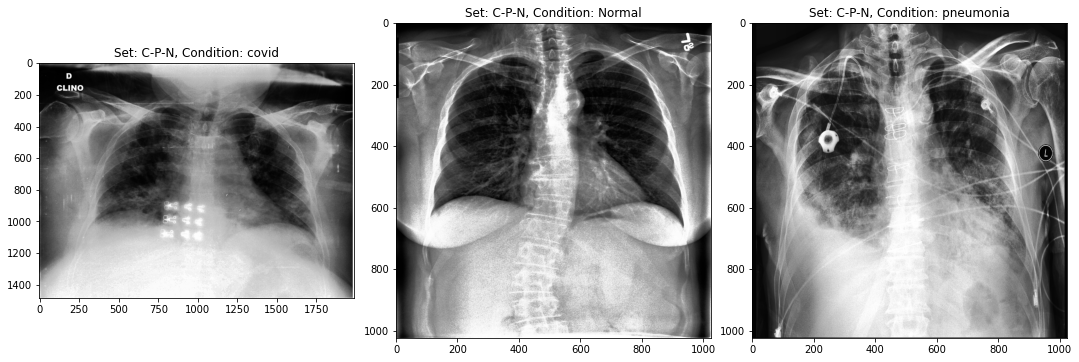

In [ ]:
input_path = '/content/drive/MyDrive/Covid git/N-CLAHE-MEDICAL-IMAGES/CXR/'

fig, ax = plt.subplots(1, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['C-P-N']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/covid/'+os.listdir(set_path+'/covid')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: covid'.format(_set))
    ax[i+1].imshow(plt.imread(set_path+'/no_finding/'+os.listdir(set_path+'/no_finding')[0]), cmap='gray')
    ax[i+1].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+2].imshow(plt.imread(set_path+'/pneumonia/'+os.listdir(set_path+'/pneumonia')[0]), cmap='gray')
    ax[i+2].set_title('Set: {}, Condition: pneumonia'.format(_set))

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/train')
test = get_training_data('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/test')
val = get_training_data('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val')

KeyboardInterrupt: ignored